<a href="https://colab.research.google.com/github/Simarjit1303/Data-Science/blob/main/exercises/machine-learning/supervised-learning/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
You should build a machine learning pipeline using a linear regression model. In particular, you should do the following:
- Load the `housing` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a linear regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [32]:
# prompt: Load the adult dataset using Pandas.

import pandas as pd
from sklearn import model_selection, linear_model, preprocessing, metrics

# Data Collection

In [5]:
# impoertimg dataset
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/housing.csv")
df.head()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [22]:
print(df.isnull().sum())

id                  0
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
stories.1           0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
# train_test_split() uses 25% for test an 75% for training
df_train, df_test = model_selection.train_test_split(df)
print("df_size", df.shape)
print("df_train_size", df_train.shape)
print("df_test_size", df_test.shape)

df_size (545, 14)
df_train_size (408, 14)
df_test_size (137, 14)


# Data Exploration

In [7]:
df_train.dtypes

,0
id,int64
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
stories.1,int64
guestroom,int64
basement,int64
hotwaterheating,int64


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'stories.1'}>,
        <Axes: title={'center': 'guestroom'}>],
       [<Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>],
       [<Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >]],
      dtype=object)

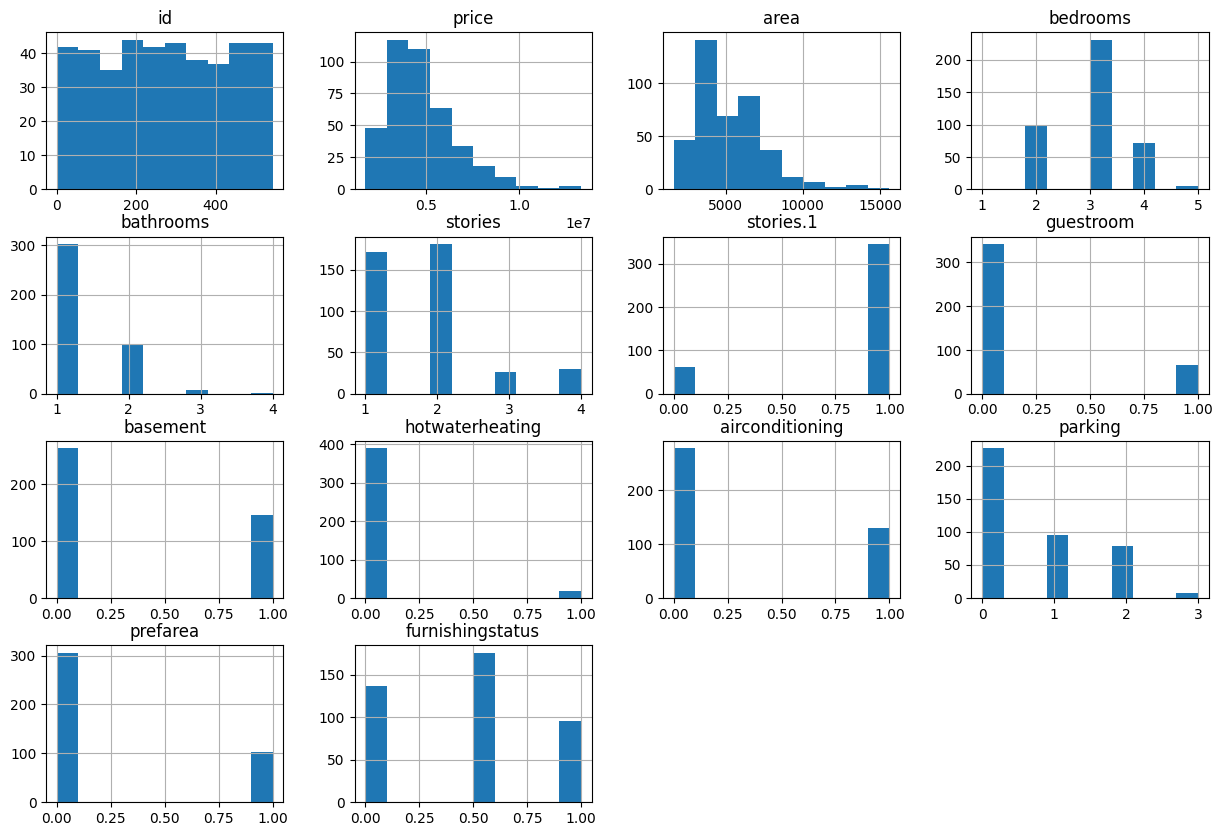

In [16]:
# Visulaing train data
df_train.hist(figsize=(15, 10))

# Data Reprocessing

In [24]:
# using the below code to remove explicit code from the dataset
df_train = df_train.dropna()
df_test = df_test.dropna()

# printing the outcome to check the values in dataframe
print("x_train_size", df_train.shape)
print("x_test_size", df_test.shape)

x_train_size (408, 14)
x_test_size (137, 14)


In [28]:
# Drop methods by default removes the row but here we want to remove the column
# "price" so that's why we have mentioned the axis value to 1 for dropping the column
x_train = df_train.drop("price", axis=1)
# We need to separate the features from the target labels
y_train = df_train["price"]
x_test = df_test.drop("price",axis=1)
y_test = df_test["price"]

print("x_train size:",x_train.shape)
print("y_train size:",y_train.shape)
print("x_test size:",x_test.shape)
print("y_test size:",y_test.shape)


x_train size: (408, 13)
y_train size: (408,)
x_test size: (137, 13)
y_test size: (137,)


# Scalling the dataset

In [30]:
# Scaling the dataset
scaler = preprocessing.StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#  Model Training

In [33]:
model = linear_model.LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

# Model Evaluation

In [34]:
y_pred = model.predict(x_test_scaled)

In [35]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Squared Error Score: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error Score: 374508596494.48553
R-squared Score: 0.8893787448731947
